# Cyclistic Case Study

This is a case study on a made-up organization Cyclistic. It launched a successful bike-share offering in 2016. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime.

Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers
who purchase annual memberships are Cyclistic members.

## Question to be answered
**How do annual members and casual riders use Cyclistic bikes differently?**

Busniess Task: Goal is to understand how casual riders and annual members use Cyclistic differently to maximize the profit by converting casual riders to annual members. We will analyse Cyclistic historical trip data of past 12 months to help marketing team plan specific campaigns for casual riders to buy membership.
 
**How our insights can drive business decisions?**
Our insights will help marketing team to plan specific campaigns for casual riders to buy a membership. This will raise the profits of the organisation.


## Prepare data for Analysis

**Download data and store it appropriately.**
Data is downloaded for 12 months of year 2020-21 from the data source provided. It is stored in CSV file in 12 different files divided month wise. We have data from November-2020 to October-2021.

**Identify how it’s organized.**
Data is divided into 12 CSV files month wise for the year 2020-21. The data contains Cyclistic trip data for both casual riders and annual member. The data includes information like trip start and end date, source and destination station of the trip, source and destination latitudes and longitudes and rider type (casual or member).

**How does it help you answer your question?**
The data has trip details for both casual and member riders. This can be helpful to compare the trip details for both types of riders and find out the difference in their respective usage of Cyclistic service.


In [1]:
library(tidyverse)
library(ggplot2)

# Data stored to dataframes according to monthly data

Nov_20 <- read.csv('../input/cyclistic-case-study-dataset/202011-divvy-tripdata.csv')

Dec_20 <- read.csv('../input/cyclistic-case-study-dataset/202012-divvy-tripdata.csv')

Jan_21 <- read.csv('../input/cyclistic-case-study-dataset/202101-divvy-tripdata.csv')

Feb_21 <- read.csv('../input/cyclistic-case-study-dataset/202102-divvy-tripdata.csv')

Mar_21 <- read.csv('../input/cyclistic-case-study-dataset/202103-divvy-tripdata.csv')

Apr_21 <- read.csv('../input/cyclistic-case-study-dataset/202104-divvy-tripdata.csv')

May_21 <- read.csv('../input/cyclistic-case-study-dataset/202105-divvy-tripdata.csv')

Jun_21 <- read.csv('../input/cyclistic-case-study-dataset/202106-divvy-tripdata.csv')

Jul_21 <- read.csv('../input/cyclistic-case-study-dataset/202107-divvy-tripdata.csv')

Aug_21 <- read.csv('../input/cyclistic-case-study-dataset/202108-divvy-tripdata.csv')

Sep_21 <- read.csv('../input/cyclistic-case-study-dataset/202109-divvy-tripdata.csv')

Oct_21 <- read.csv('../input/cyclistic-case-study-dataset/202110-divvy-tripdata.csv')


# To check the srtucture of all the data files are same to prepare for combining all the data files to one single source


str(Nov_20)
str(Dec_20)
str(Jan_21)
str(Feb_21)
str(Mar_21)
str(Apr_21)
str(May_21)
str(Jun_21)
str(Jul_21)
str(Aug_21)
str(Sep_21)
str(Oct_21)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



'data.frame':	259716 obs. of  13 variables:
 $ ride_id           : chr  "BD0A6FF6FFF9B921" "96A7A7A4BDE4F82D" "C61526D06582BDC5" "E533E89C32080B9E" ...
 $ rideable_type     : chr  "electric_bike" "electric_bike" "electric_bike" "electric_bike" ...
 $ started_at        : chr  "2020-11-01 13:36:00" "2020-11-01 10:03:26" "2020-11-01 00:34:05" "2020-11-01 00:45:16" ...
 $ ended_at          : chr  "2020-11-01 13:45:40" "2020-11-01 10:14:45" "2020-11-01 01:03:06" "2020-11-01 00:54:31" ...
 $ start_station_name: chr  "Dearborn St & Erie St" "Franklin St & Illinois St" "Lake Shore Dr & Monroe St" "Leavitt St & Chicago Ave" ...
 $ start_station_id  : int  110 672 76 659 2 72 76 NA 58 394 ...
 $ end_station_name  : chr  "St. Clair St & Erie St" "Noble St & Milwaukee Ave" "Federal St & Polk St" "Stave St & Armitage Ave" ...
 $ end_station_id    : int  211 29 41 185 2 76 72 NA 288 273 ...
 $ start_lat         : num  41.9 41.9 41.9 41.9 41.9 ...
 $ start_lng         : num  -87.6 -87.6 -87.6 -87.7 -

The dataframe ‘Nov_20’ has ‘start_station_id’ and ‘end_station_id’ as int datatype. Whereas all other dataframes has these columns as char data types. Hence, data types for these two columns are changes to char for ‘Nov_20’ dataframe.

In [2]:
#change data type to char for start_station_id

Nov_20$start_station_id <- as.character(Nov_20$start_station_id)
str(Nov_20)

Nov_20$end_station_id <- as.character(Nov_20$end_station_id)
str(Nov_20)

'data.frame':	259716 obs. of  13 variables:
 $ ride_id           : chr  "BD0A6FF6FFF9B921" "96A7A7A4BDE4F82D" "C61526D06582BDC5" "E533E89C32080B9E" ...
 $ rideable_type     : chr  "electric_bike" "electric_bike" "electric_bike" "electric_bike" ...
 $ started_at        : chr  "2020-11-01 13:36:00" "2020-11-01 10:03:26" "2020-11-01 00:34:05" "2020-11-01 00:45:16" ...
 $ ended_at          : chr  "2020-11-01 13:45:40" "2020-11-01 10:14:45" "2020-11-01 01:03:06" "2020-11-01 00:54:31" ...
 $ start_station_name: chr  "Dearborn St & Erie St" "Franklin St & Illinois St" "Lake Shore Dr & Monroe St" "Leavitt St & Chicago Ave" ...
 $ start_station_id  : chr  "110" "672" "76" "659" ...
 $ end_station_name  : chr  "St. Clair St & Erie St" "Noble St & Milwaukee Ave" "Federal St & Polk St" "Stave St & Armitage Ave" ...
 $ end_station_id    : int  211 29 41 185 2 76 72 NA 288 273 ...
 $ start_lat         : num  41.9 41.9 41.9 41.9 41.9 ...
 $ start_lng         : num  -87.6 -87.6 -87.6 -87.7 -87.6 ...
 

Now all the dataframes are consistent, they are all joined into a single dataframe ‘combine_data’ using bind_row() function.

In [3]:
# combine all data

library(dplyr)

combine_data <- bind_rows(
  Nov_20, Dec_20, Jan_21, Feb_21, Mar_21, Apr_21, May_21,
  Jun_21, Jul_21, Aug_21, Sep_21, Oct_21)

str(combine_data)

'data.frame':	5378834 obs. of  13 variables:
 $ ride_id           : chr  "BD0A6FF6FFF9B921" "96A7A7A4BDE4F82D" "C61526D06582BDC5" "E533E89C32080B9E" ...
 $ rideable_type     : chr  "electric_bike" "electric_bike" "electric_bike" "electric_bike" ...
 $ started_at        : chr  "2020-11-01 13:36:00" "2020-11-01 10:03:26" "2020-11-01 00:34:05" "2020-11-01 00:45:16" ...
 $ ended_at          : chr  "2020-11-01 13:45:40" "2020-11-01 10:14:45" "2020-11-01 01:03:06" "2020-11-01 00:54:31" ...
 $ start_station_name: chr  "Dearborn St & Erie St" "Franklin St & Illinois St" "Lake Shore Dr & Monroe St" "Leavitt St & Chicago Ave" ...
 $ start_station_id  : chr  "110" "672" "76" "659" ...
 $ end_station_name  : chr  "St. Clair St & Erie St" "Noble St & Milwaukee Ave" "Federal St & Polk St" "Stave St & Armitage Ave" ...
 $ end_station_id    : chr  "211" "29" "41" "185" ...
 $ start_lat         : num  41.9 41.9 41.9 41.9 41.9 ...
 $ start_lng         : num  -87.6 -87.6 -87.6 -87.7 -87.6 ...
 $ end_lat 

In [4]:
#convert date cloumns to datetime datatype

library(lubridate)

combine_data$started_at <- ymd_hms(combine_data$started_at)
combine_data$ended_at <- ymd_hms(combine_data$ended_at)
str(combine_data)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




'data.frame':	5378834 obs. of  13 variables:
 $ ride_id           : chr  "BD0A6FF6FFF9B921" "96A7A7A4BDE4F82D" "C61526D06582BDC5" "E533E89C32080B9E" ...
 $ rideable_type     : chr  "electric_bike" "electric_bike" "electric_bike" "electric_bike" ...
 $ started_at        : POSIXct, format: "2020-11-01 13:36:00" "2020-11-01 10:03:26" ...
 $ ended_at          : POSIXct, format: "2020-11-01 13:45:40" "2020-11-01 10:14:45" ...
 $ start_station_name: chr  "Dearborn St & Erie St" "Franklin St & Illinois St" "Lake Shore Dr & Monroe St" "Leavitt St & Chicago Ave" ...
 $ start_station_id  : chr  "110" "672" "76" "659" ...
 $ end_station_name  : chr  "St. Clair St & Erie St" "Noble St & Milwaukee Ave" "Federal St & Polk St" "Stave St & Armitage Ave" ...
 $ end_station_id    : chr  "211" "29" "41" "185" ...
 $ start_lat         : num  41.9 41.9 41.9 41.9 41.9 ...
 $ start_lng         : num  -87.6 -87.6 -87.6 -87.7 -87.6 ...
 $ end_lat           : num  41.9 41.9 41.9 41.9 41.9 ...
 $ end_lng        

Create a new column ‘ride_length’ by subtracting end_at from start_at. Used difftime() function to calculate time difference.

In [5]:
#add ride_length

combine_data <- mutate(combine_data, ride_length=difftime(combine_data$ended_at,combine_data$started_at, unit="secs"))
str(combine_data)

'data.frame':	5378834 obs. of  14 variables:
 $ ride_id           : chr  "BD0A6FF6FFF9B921" "96A7A7A4BDE4F82D" "C61526D06582BDC5" "E533E89C32080B9E" ...
 $ rideable_type     : chr  "electric_bike" "electric_bike" "electric_bike" "electric_bike" ...
 $ started_at        : POSIXct, format: "2020-11-01 13:36:00" "2020-11-01 10:03:26" ...
 $ ended_at          : POSIXct, format: "2020-11-01 13:45:40" "2020-11-01 10:14:45" ...
 $ start_station_name: chr  "Dearborn St & Erie St" "Franklin St & Illinois St" "Lake Shore Dr & Monroe St" "Leavitt St & Chicago Ave" ...
 $ start_station_id  : chr  "110" "672" "76" "659" ...
 $ end_station_name  : chr  "St. Clair St & Erie St" "Noble St & Milwaukee Ave" "Federal St & Polk St" "Stave St & Armitage Ave" ...
 $ end_station_id    : chr  "211" "29" "41" "185" ...
 $ start_lat         : num  41.9 41.9 41.9 41.9 41.9 ...
 $ start_lng         : num  -87.6 -87.6 -87.6 -87.7 -87.6 ...
 $ end_lat           : num  41.9 41.9 41.9 41.9 41.9 ...
 $ end_lng        

In [6]:
#Create new columns for by splitting started_at into year, month, week, date, day_of_week.

combine_data$year <- format(combine_data$started_at,"%Y")
combine_data$month <- format(combine_data$started_at,"%m")
combine_data$week <- format(combine_data$started_at,"%W")
combine_data$date <- format(combine_data$started_at,"%D")
combine_data$day_of_week <- format(combine_data$started_at,"%A")
head(combine_data)

combine_data <- arrange(combine_data, by=started_at)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,year,month,week,date,day_of_week
,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<drtn>,<chr>,<chr>,<chr>,<chr>,<chr>
1,BD0A6FF6FFF9B921,electric_bike,2020-11-01 13:36:00,2020-11-01 13:45:40,Dearborn St & Erie St,110,St. Clair St & Erie St,211,41.89418,-87.62913,41.89443,-87.62338,casual,580 secs,2020,11,43,11/01/20,Sunday
2,96A7A7A4BDE4F82D,electric_bike,2020-11-01 10:03:26,2020-11-01 10:14:45,Franklin St & Illinois St,672,Noble St & Milwaukee Ave,29,41.89096,-87.63534,41.90067,-87.66248,casual,679 secs,2020,11,43,11/01/20,Sunday
3,C61526D06582BDC5,electric_bike,2020-11-01 00:34:05,2020-11-01 01:03:06,Lake Shore Dr & Monroe St,76,Federal St & Polk St,41,41.88098,-87.61675,41.87205,-87.62955,casual,1741 secs,2020,11,43,11/01/20,Sunday
4,E533E89C32080B9E,electric_bike,2020-11-01 00:45:16,2020-11-01 00:54:31,Leavitt St & Chicago Ave,659,Stave St & Armitage Ave,185,41.89550,-87.68201,41.91774,-87.69139,casual,555 secs,2020,11,43,11/01/20,Sunday
5,1C9F4EF18C168C60,electric_bike,2020-11-01 15:43:25,2020-11-01 16:16:52,Buckingham Fountain,2,Buckingham Fountain,2,41.87650,-87.62036,41.87645,-87.62034,casual,2007 secs,2020,11,43,11/01/20,Sunday
6,7259585D8276D338,electric_bike,2020-11-14 15:55:17,2020-11-14 16:44:38,Wabash Ave & 16th St,72,Lake Shore Dr & Monroe St,76,41.86029,-87.62581,41.88099,-87.61677,casual,2961 secs,2020,11,45,11/14/20,Saturday


## Cleaning the dataset

In [7]:
#remove those rows which has negative or zero ride_length

zero_ride_length <- combine_data %>%
  filter(ride_length<=0)
glimpse(zero_ride_length)

combine_data <- combine_data %>%
  filter(!(ride_length<=0))

Rows: 1,881
Columns: 19
$ ride_id            <chr> "0BDBD92B88766BB5", "4FABB025A0D5F155", "A3BF62175D…
$ rideable_type      <chr> "electric_bike", "docked_bike", "docked_bike", "doc…
$ started_at         <dttm> 2020-11-01 01:17:42, 2020-11-01 01:33:39, 2020-11-…
$ ended_at           <dttm> 2020-11-01 01:14:21, 2020-11-01 01:19:36, 2020-11-…
$ start_station_name <chr> "Franklin St & Chicago Ave", "Cottage Grove Ave & 6…
$ start_station_id   <chr> "31", "427", "427", "153", "306", "13", "13", NA, "…
$ end_station_name   <chr> "State St & Pershing Rd", "Cottage Grove Ave & 63rd…
$ end_station_id     <chr> "407", "427", "427", "74", "464", "492", NA, "290",…
$ start_lat          <dbl> 41.89669, 41.78060, 41.78060, 41.93573, 41.95852, 4…
$ start_lng          <dbl> -87.63578, -87.60611, -87.60611, -87.66358, -87.654…
$ end_lat            <dbl> 41.82304, 41.78060, 41.78060, 41.89381, 41.97559, 4…
$ end_lng            <dbl> -87.62658, -87.60611, -87.60611, -87.64170, -87.679…
$ member_casual 

In [8]:
#remove those rows which has incomplete data. Like which does not have start_station_name or end_station_name

combine_data <- combine_data %>%
  filter(
    !(start_station_name == "" | is.na(start_station_name))) %>%
  filter(
    !(end_station_name == "" | is.na(end_station_name)))

In [9]:
#remove bad/unwanted data

head(combine_data[combine_data$start_station_name=='HQ QR']$start_station_name)

glimpse(combine_data)

NULL

Rows: 4,491,470
Columns: 19
$ ride_id            <chr> "D0C1A65AFC859916", "985AD418D8ED316C", "AB459A840C…
$ rideable_type      <chr> "docked_bike", "docked_bike", "docked_bike", "elect…
$ started_at         <dttm> 2020-11-01 00:00:08, 2020-11-01 00:00:14, 2020-11-…
$ ended_at           <dttm> 2020-11-01 00:35:08, 2020-11-01 00:02:20, 2020-11-…
$ start_station_name <chr> "Broadway & Barry Ave", "Desplaines St & Kinzie St"…
$ start_station_id   <chr> "300", "56", "303", "291", "291", "110", "153", "34…
$ end_station_name   <chr> "Broadway & Barry Ave", "Desplaines St & Randolph S…
$ end_station_id     <chr> "300", "96", "240", "31", "31", "291", "289", "226"…
$ start_lat          <dbl> 41.93758, 41.88872, 41.94553, 41.90676, 41.90669, 4…
$ start_lng          <dbl> -87.64410, -87.64445, -87.64644, -87.63510, -87.635…
$ end_lat            <dbl> 41.93758, 41.88462, 41.95425, 41.89692, 41.89712, 4…
$ end_lng            <dbl> -87.64410, -87.64457, -87.65441, -87.63570, -87.635…
$ member_cas

## Analyze dataset

In order to define metrics, we can analyze variables like ride_length, average of ride time. By analysing we can define below two metrics:
1.	Number of rides by rider type
2.	Number of rides by average ride time


In [10]:
table(combine_data$day_of_week)
table(combine_data$member_casual)


   Friday    Monday  Saturday    Sunday  Thursday   Tuesday Wednesday 
   643637    559608    822227    714280    581729    578095    591894 


 casual  member 
2030677 2460793 

In [11]:
mean(combine_data$ride_length)
median(combine_data$ride_length)
max(combine_data$ride_length)
min(combine_data$ride_length)

Time difference of 1338.347 secs

Time difference of 751 secs

Time difference of 3356649 secs

Time difference of 1 secs

In [12]:
aggregate(combine_data$ride_length, by=list(combine_data$member_casual), FUN=mean)
aggregate(combine_data$ride_length, by=list(combine_data$member_casual), FUN=median)
aggregate(combine_data$ride_length, by=list(combine_data$member_casual), FUN=max)
aggregate(combine_data$ride_length, by=list(combine_data$member_casual), FUN=min)
aggregate(combine_data$ride_length, by=list(combine_data$member_casual), FUN=length)

Group.1,x
<chr>,<drtn>
casual,1980.0732 secs
member,808.7866 secs


Group.1,x
<chr>,<drtn>
casual,1018 secs
member,597 secs


Group.1,x
<chr>,<drtn>
casual,3356649 secs
member,89996 secs


Group.1,x
<chr>,<drtn>
casual,1 secs
member,1 secs


Group.1,x
<chr>,<int>
casual,2030677
member,2460793


In [13]:
# See the average ride time by each day for members vs casual users

aggregate(combine_data$ride_length, by=list(combine_data$member_casual,
                                            combine_data$day_of_week),
          FUN=mean)

Group.1,Group.2,x
<chr>,<chr>,<drtn>
casual,Friday,1883.2074 secs
member,Friday,785.1688 secs
casual,Monday,1976.2698 secs
member,Monday,779.8174 secs
casual,Saturday,2125.2131 secs
member,Saturday,905.8238 secs
casual,Sunday,2290.8703 secs
member,Sunday,926.3637 secs
casual,Thursday,1701.8945 secs


In [14]:
#correct order of day_of_week

combine_data$day_of_week <- ordered(combine_data$day_of_week, levels=c('Sunday',
                              'Monday','Tuesday','Wednesday','Thursday',
                              'Friday','Saturday'))

aggregate(combine_data$ride_length, by=list(combine_data$member_casual,
                                            combine_data$day_of_week),
          FUN=mean)

Group.1,Group.2,x
<chr>,<ord>,<drtn>
casual,Sunday,2290.8703 secs
member,Sunday,926.3637 secs
casual,Monday,1976.2698 secs
member,Monday,779.8174 secs
casual,Tuesday,1759.6129 secs
member,Tuesday,760.6113 secs
casual,Wednesday,1714.4653 secs
member,Wednesday,763.9263 secs
casual,Thursday,1701.8945 secs


In [15]:
# analyze ridership data by type and weekday

combine_data %>%
  mutate(weekday=wday(started_at,label = TRUE))%>%
  group_by(member_casual,weekday)%>%
  summarise(number_of_rides = n(),average_duration=mean(ride_length))%>%
  arrange(member_casual,weekday)

`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.



member_casual,weekday,number_of_rides,average_duration
<chr>,<ord>,<int>,<drtn>
casual,Sun,403646,2290.8703 secs
casual,Mon,226245,1976.2698 secs
casual,Tue,210714,1759.6129 secs
casual,Wed,213298,1714.4653 secs
casual,Thu,221388,1701.8945 secs
casual,Fri,287328,1883.2074 secs
casual,Sat,468058,2125.2131 secs
member,Sun,310634,926.3637 secs
member,Mon,333363,779.8174 secs


Warning message:
“Use of `combine_data$member_casual` is discouraged. Use `member_casual` instead.”
`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.



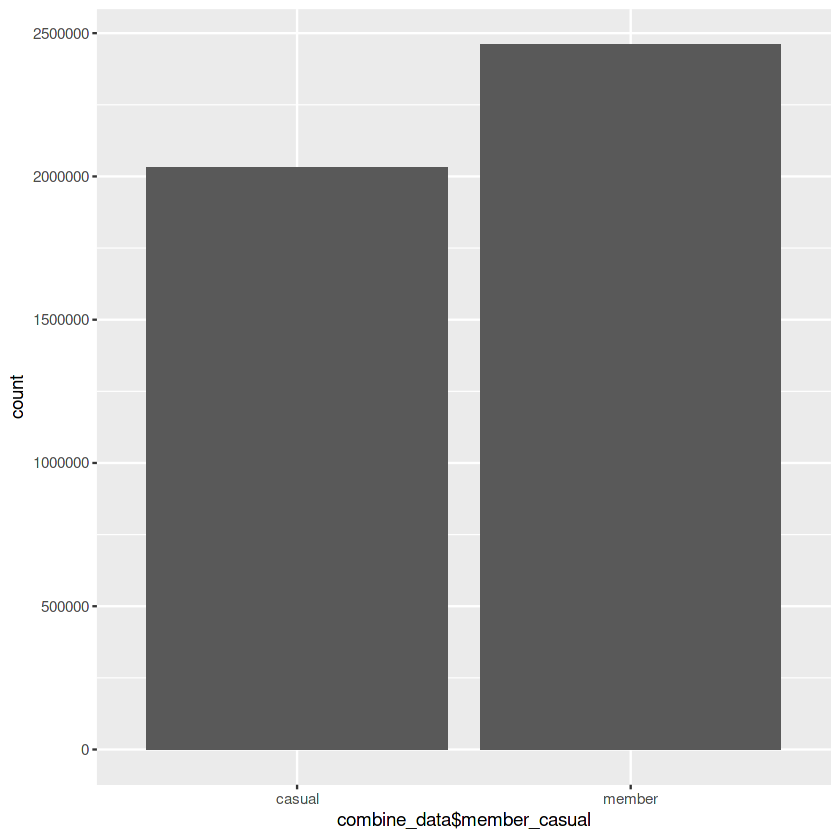

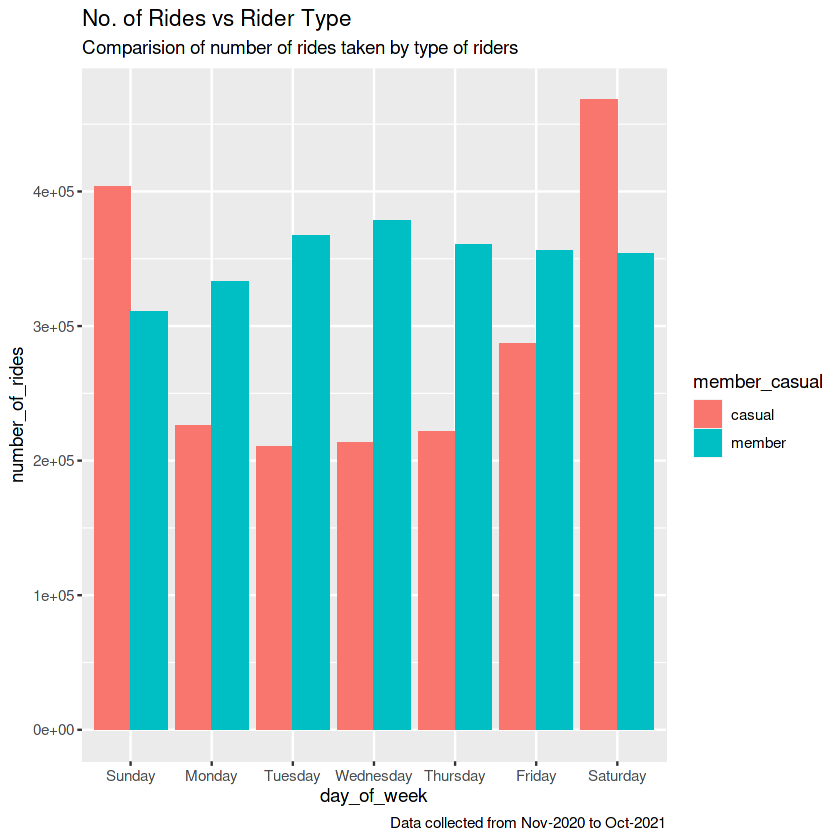

In [16]:
# Let's visualize the number of rides by rider type

ggplot(data=combine_data,mapping = aes(x=combine_data$member_casual))+geom_bar()

combine_data %>%
  group_by(member_casual,day_of_week)%>%
  summarise(number_of_rides = n(),average_duration=mean(ride_length))%>%
  arrange(member_casual,day_of_week)%>%
  ggplot(aes(x=day_of_week, y=number_of_rides, fill=member_casual))+
  geom_col(position = "dodge")+
  labs(title='No. of Rides vs Rider Type',subtitle='Comparision of number of rides taken by type of riders',
       caption='Data collected from Nov-2020 to Oct-2021')

`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.

Don't know how to automatically pick scale for object of type difftime. Defaulting to continuous.



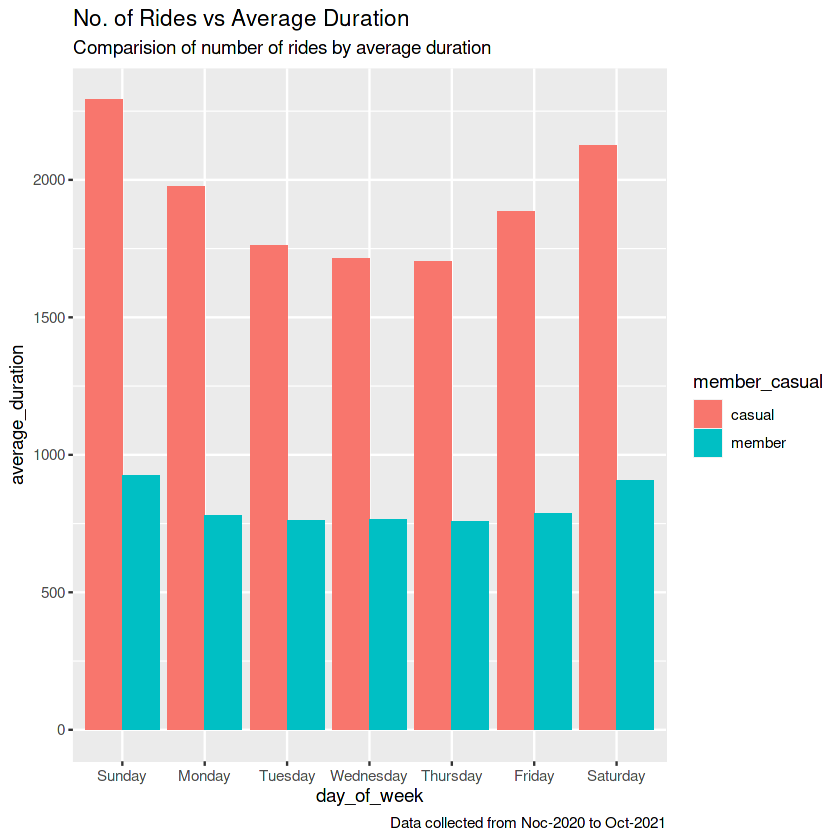

In [17]:
# Let's create a visualization for average duration

combine_data %>%
  group_by(member_casual,day_of_week)%>%
  summarise(number_of_rides = n(),average_duration=mean(ride_length))%>%
  arrange(member_casual,day_of_week)%>%
  ggplot(aes(x=day_of_week, y=average_duration, fill=member_casual))+
  geom_col(position = "dodge")+
  labs(title = 'No. of Rides vs Average Duration', subtitle = 'Comparision of number of rides by average duration',
       caption = "Data collected from Noc-2020 to Oct-2021")

By creating visualizations for above metrics below observations are made:
- When analysing number of rides by rider type it is seen that on weekends casual riders are using Cyclistic service more number of times than the members. Which is not the case on weekdays.
-Most number of rides taken by casual riders is recorded on Saturdays.
-Number of rides taken by members are comparatively consistent throughout the week peaking on Wednesday.
-From the plot between no. of rides and average ride duration, it is found out that casual riders take the Cyclistic services for greater duration of time than member on an average.
-For casual member the maximum average ride duration is recorded on weekends whereas for members it is fairly even throughout it week peaking on weekends as well.


## Final Conclusion

Based on analysis of past 12 month Cyclistic ride data, it has come out that casual members use services actively on weekends as compared to members. The ride lengths for casual member are very high compared to member which shows that casual riders like to use services for greater distance. On the other hand, members use the services for frequent distances and preferably on weekdays.
Top three recommendations:
1.	Marketing team should focus on planning campaigns on weekends to reach out to maximum number of casual riders.
2.	They add special offers/discounts on longer rides taken under membership plan to attract casual riders to buy membership.
3.	They can provide weekly offers on basis of total distances travelled so that casual riders can consider buying membership.


Below link takes to my Tableau Visualisation
https://public.tableau.com/app/profile/divya.jain7194/viz/CyclisticCaseStudy_16389846429940/DayvsRideLength#1
